In [3]:
import pandas as pd
import numpy as np
# Assuming you have a DataFrame named 'd' or modify this line to load your data
d = pd.read_csv('Assets/final_dataset.csv')



In [4]:
X=d.drop(['SUBJECT_ID','SESSION_ID','TRIAL_ID','CLASS_LABEL'], axis=1)
y=d['CLASS_LABEL']

In [5]:
# import all libraries

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [6]:
print(X.shape, y.shape)

(135954, 1010) (135954,)


In [7]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(d.drop(labels=['CLASS_LABEL','SUBJECT_ID','SESSION_ID','TRIAL_ID'], axis=1),
    d['CLASS_LABEL'],
    test_size=0.3,
    random_state=0)

In [8]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00263235, 0.1347854 , 0.24836729, ..., 0.27844899, 0.28075053,
       0.45970645])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

F_V_PRO_101       0.460008
F_V_PRO_101.1     0.459706
F_AP_PRO_91.1     0.386269
F_AP_PRO_89       0.385500
F_AP_PRO_90       0.384655
                    ...   
COP_ML_PRO_61     0.229242
COP_AP_PRO_2      0.134785
COP_AP_PRO_2.1    0.115893
COP_AP_PRO_1      0.002632
COP_AP_PRO_1.1    0.000000
Length: 1010, dtype: float64

<Axes: >

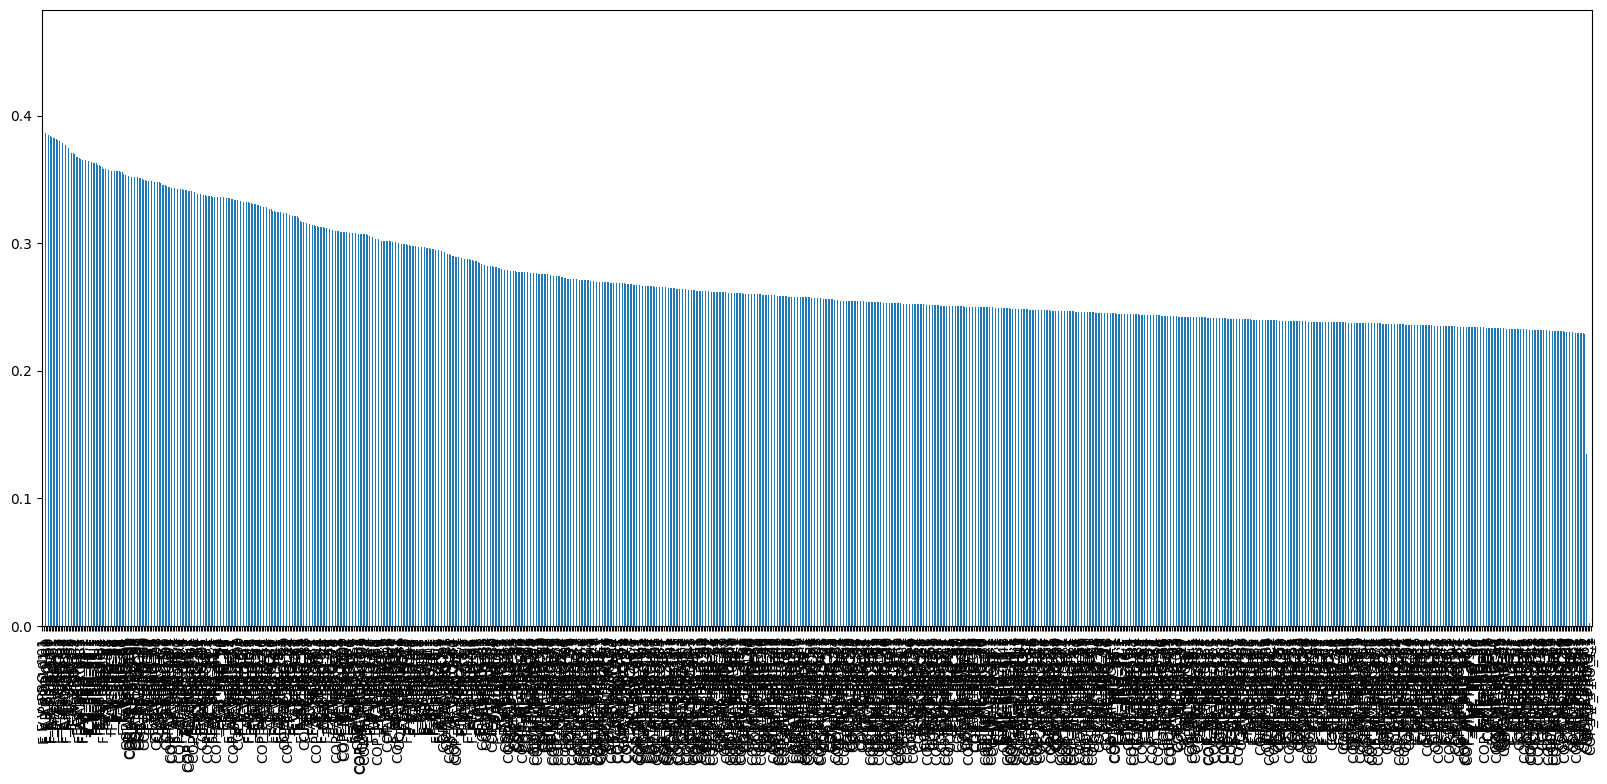

In [10]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]